<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/CLUSTERING/ejercicio_model_selection/Cluster_Iris_Miquel_Batalla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import seaborn as sns
import pandas as pd

di = sns.load_dataset('iris').dropna()
diNum=di.select_dtypes(include='number')
diNum.shape

(150, 4)

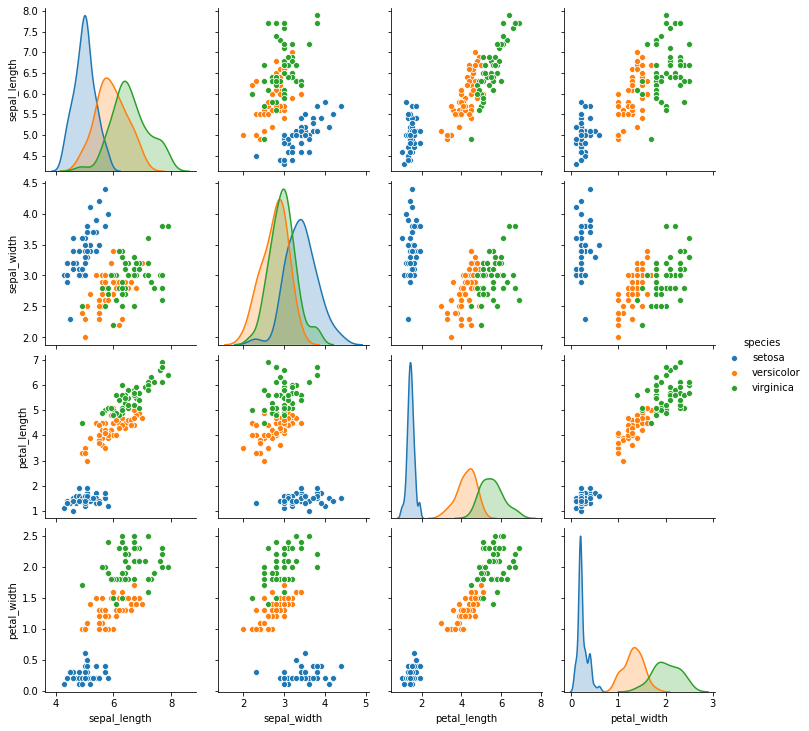

In [10]:
g = sns.pairplot(di, hue="species")

In [12]:
from sklearn.datasets import make_blobs
import numpy as np
from sklearn import mixture

NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(diNum)
    bic.append(gmm.bic(diNum))
    print(bic)

num_result = np.argmin(bic)
print(num_result+1)

[829.9781545093942]
[829.9781545093942, 574.017832720746]
[829.9781545093942, 574.017832720746, 580.8594247694392]
[829.9781545093942, 574.017832720746, 580.8594247694392, 625.7541939508153]
[829.9781545093942, 574.017832720746, 580.8594247694392, 625.7541939508153, 679.0515225655529]
[829.9781545093942, 574.017832720746, 580.8594247694392, 625.7541939508153, 679.0515225655529, 730.7397452415]
[829.9781545093942, 574.017832720746, 580.8594247694392, 625.7541939508153, 679.0515225655529, 730.7397452415, 765.760496185175]
[829.9781545093942, 574.017832720746, 580.8594247694392, 625.7541939508153, 679.0515225655529, 730.7397452415, 765.760496185175, 831.379048211135]
[829.9781545093942, 574.017832720746, 580.8594247694392, 625.7541939508153, 679.0515225655529, 730.7397452415, 765.760496185175, 831.379048211135, 836.613348349956]
[829.9781545093942, 574.017832720746, 580.8594247694392, 625.7541939508153, 679.0515225655529, 730.7397452415, 765.760496185175, 831.379048211135, 836.61334834995

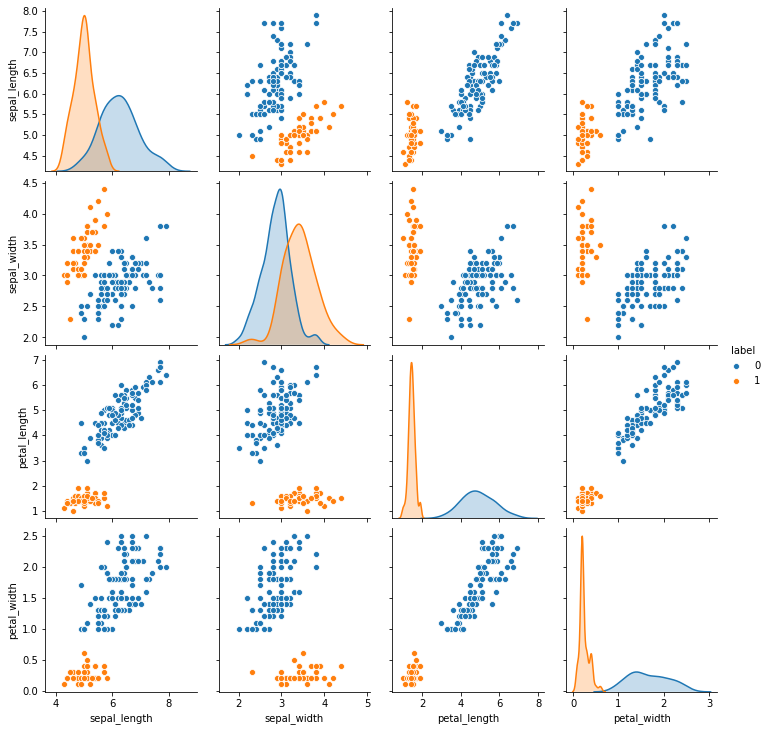

In [13]:
gmm = mixture.GaussianMixture(n_components=num_result+1,covariance_type='full').fit(diNum)
grouped = gmm.predict(diNum)
diNum['label'] = grouped
g = sns.pairplot(diNum, hue="label")